# Cereal Rating Prediction

## Load data & modules

In [ ]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#unzip the file
!unzip -qq '/content/archive (4).zip'

replace cereal.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# read the data
data = pd.read_csv('/content/cereal.csv')

In [ ]:
# see columns of the data
data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [ ]:
# convert the csv into DataFrame
df_ = pd.DataFrame(data, columns = ['name', 'mfr', 'type', 'calories', 'protein', 'fat',
                                   'sodium', 'fiber', 'carbo', 'sugars', 'potass',
                                   'vitamins', 'shelf', 'weight', 'cups','rating'])
df_.head()     # see the head of DataFrame

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
df = df_

In [ ]:
# see the shape of DataFrame
df_.shape    # (rows, columns)

(77, 16)

In [ ]:
# see the information of the DataFrame
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


## Preprocessing

In [ ]:
# Drop the name column
df_ = df_.drop('name', axis=1)

In [ ]:
# check, is there any Null value in the DataFrame
df_.isnull().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
# check, is there any Negative value in the DataFrame
(df_ == -1).sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
# replace the Negative Value with Null values
df_ = df_.replace(to_replace=-1, value= np.NaN)
df_.isna().sum()   # check which column has Null value

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
# fill the Null values of each column with their respective Mean
for column in ['carbo', 'sugars', 'potass']:
  df_[column] = df_[column].fillna(df_[column].mean())

In [ ]:
# check is there any Null value in the DataFrame
df_.isna().sum().sum()

0

### Encoding

In [ ]:
# make a dictionary of object type columns & their values
{column : list(df_[column].unique()) for column in ['mfr', 'type']}

{'mfr': ['N', 'Q', 'K', 'R', 'G', 'P', 'A'], 'type': ['C', 'H']}

In [ ]:
# numerically encode the 'type' column
df_['type'] = df_['type'].apply(lambda x: 1 if x=='H' else 0)

In [ ]:
# one-hot encode the 'mfr' column
dummies = pd.get_dummies(df_.mfr)
df_ = pd.concat([df_, dummies], axis=1)
df_ = df_.drop('mfr', axis=1)

In [ ]:
df_.head()     # see head of the DataFrame

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,weight,cups,rating,A,G,K,N,P,Q,R
0,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,...,1.0,0.75,34.384843,0,0,0,0,0,0,1


In [ ]:
# seperate the X & y values
X = df_.drop('rating', axis=1)
y = df_.rating

In [ ]:
# scale X
from sklearn.preprocessing import StandardScaler    # import Scaler
scale = StandardScaler()                            # make its object
X = pd.DataFrame(scale.fit_transform(X), columns= X.columns)

In [ ]:
X.head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,A,G,K,N,P,Q,R
0,-0.201347,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.542013,-0.237495,2.627053,-0.14627,0.957813,-0.198067,-2.123870,-0.114708,-0.632456,-0.652630,3.439961,-0.363803,-0.340503,-0.340503
1,-0.201347,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.764055,0.225316,0.526376,-1.27255,0.957813,-0.198067,0.774053,-0.114708,-0.632456,-0.652630,-0.290701,-0.363803,2.936835,-0.340503
2,-0.201347,-1.905397,1.337319,-0.012988,1.204578,2.892113,-2.023374,-0.468901,3.206550,-0.14627,0.957813,-0.198067,-2.123870,-0.114708,-0.632456,1.532262,-0.290701,-0.363803,-0.340503,-0.340503
3,-0.201347,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.764055,-1.625929,3.351425,-0.14627,0.957813,-0.198067,-1.388576,-0.114708,-0.632456,1.532262,-0.290701,-0.363803,-0.340503,-0.340503
4,-0.201347,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.208138,0.225316,0.000000,-0.14627,0.957813,-0.198067,-0.307262,-0.114708,-0.632456,-0.652630,-0.290701,-0.363803,-0.340503,2.936835


In [ ]:
# split the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33)

In [ ]:
# see shapes of training & testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((51, 20), (26, 20), (51,), (26,))

## Training

In [ ]:
# import all the regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
model = LinearRegression()
l1_model = Lasso()
l2_model = Ridge()

In [ ]:
# train the data with each model
model.fit(X_train, y_train)
l1_model.fit(X_train, y_train)
l2_model.fit(X_train, y_train)
print('Model Trained')

Model Trained


## Testing

In [ ]:
# see the score of each model
model_score = model.score(X_test, y_test) * 100
l1_score = l1_model.score(X_test, y_test) * 100
l2_score = l2_model.score(X_test, y_test) * 100

In [ ]:
# print R^2 scores of each model
print('R^2 scores of the Models')
print(f'Score without Regularization: {(model_score):.2f}%')
print(f'Score without Regularization: {(l1_score):.2f}%')
print(f'Score without Regularization: {(l2_score):.2f}%')

R^2 scores of the Models
Score without Regularization: 99.58%
Score without Regularization: 95.72%
Score without Regularization: 99.44%


## Visulaization

Text(0.5, 1.0, 'Overall Cereal Distribution')

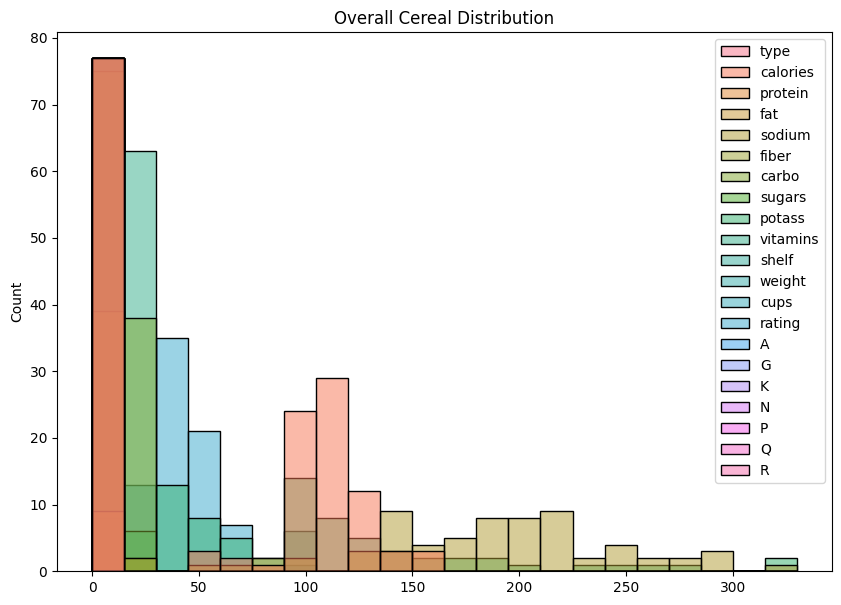

In [ ]:
#Lets see the overall distribution of our data
plt.figure(figsize=(10,7))
sns.histplot(data = df_, binwidth=15)
plt.title('Overall Cereal Distribution')

Our data appears to be right-skewed, indicating a positive skew in the data distribution. In the following sections of our notebook, we will
create histograms for each variable to gain a deeper understanding of our data

In [ ]:
# Let's create a function so that we don't need to retype everything each plot
def histogram_plot(column_data, column_name):
  plt.figure(figsize=(5,5))
  sns.histplot(data = column_data, kde=True, color = 'violet')
  plt.title(f'Distribution of {column_name}')

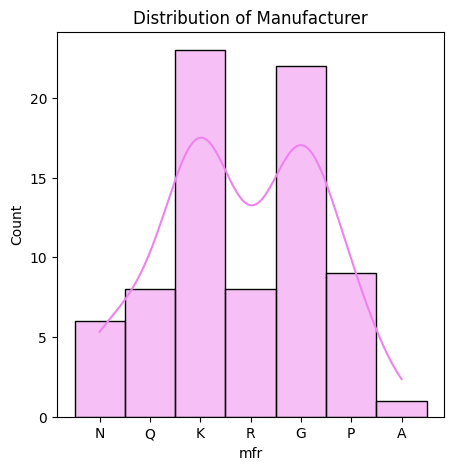

In [ ]:
histogram_plot(df['mfr'], 'Manufacturer')

The histogram reveals that Kellogs and General Mills are the primary cereal manufacturers in our dataset. This bimodal distribution
indicates two prominent peaks, highlighting the dominance of these two manufacturers in our product range.


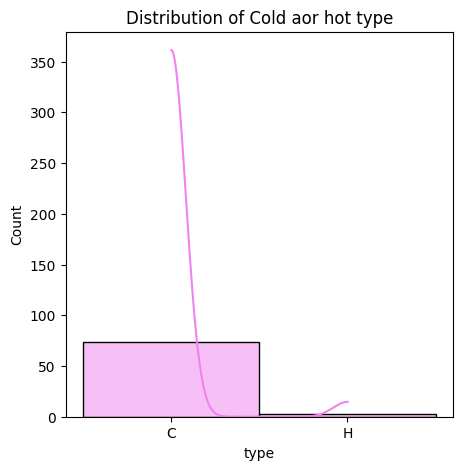

In [ ]:
histogram_plot(df['type'], 'Cold aor hot type')

Our analysis suggests that the majority of our cereals are designed to be served cold, with fewer options suitable for hot consumption.


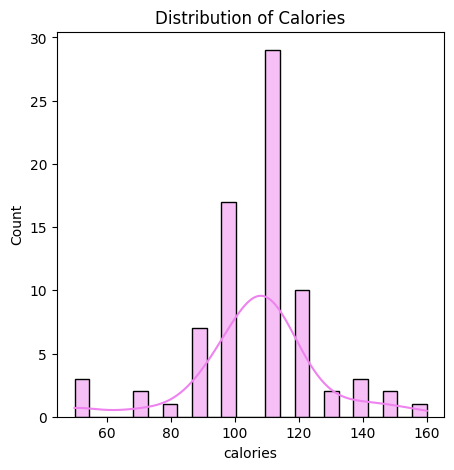

In [ ]:
histogram_plot(df['calories'], 'Calories')

The distribution of calories in our dataset exhibits a normal distribution, characterized by a bell-shaped curve. Most cereals in our dataset
provide around 100-120 calories per serving.


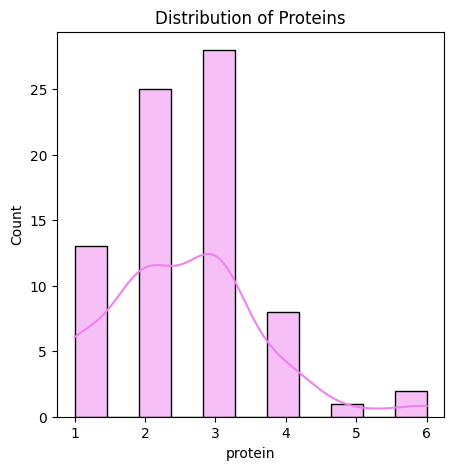

In [ ]:
histogram_plot(df['protein'], 'Proteins')

The distribution of protein content among our products predominantly falls within the range of 2-3 grams, as indicated by our right-skewed
histogram.


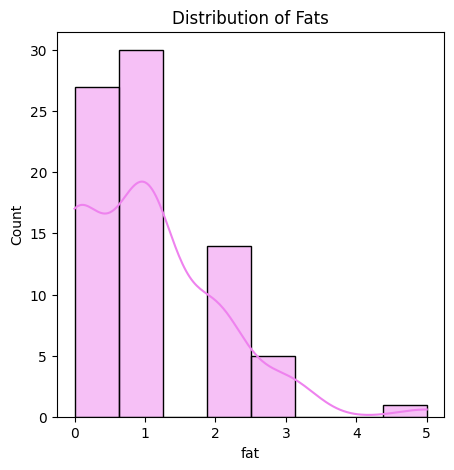

In [ ]:
histogram_plot(df['fat'], 'Fats')

The distribution of fat content per gram also exhibits a right-skewed pattern, with the majority of servings containing 0-1 gram. Some
cereals have up to 5 grams of fat per serving, which, although slightly higher, does not qualify as an extreme outlier and does not
significantly impact our analysis

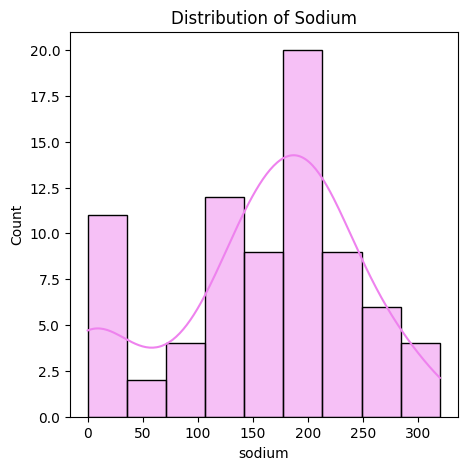

In [ ]:
histogram_plot(df['sodium'], 'Sodium')

For the contents of sodium, we can observe a normal distribution of our data, showing that 150-250 milligrams of servings for our cereals.


## Presenting and Showing Visualizations

For this cereal dataset, let's create some questions that we might want to answer using visualizations to make it easier for us to convey
our findings to the stakeholders


* Which brand has the most highest ratings?


* Are there any relationships between sugar content and rating?


* Is there a relationship between fat content and calories?

* What are the most influential factors or features that contribute to the ratings of cereals in the Cereals80 dataset?


### Which brand has the most highest ratings?

Text(0.5, 1.0, 'Ratings of Each')

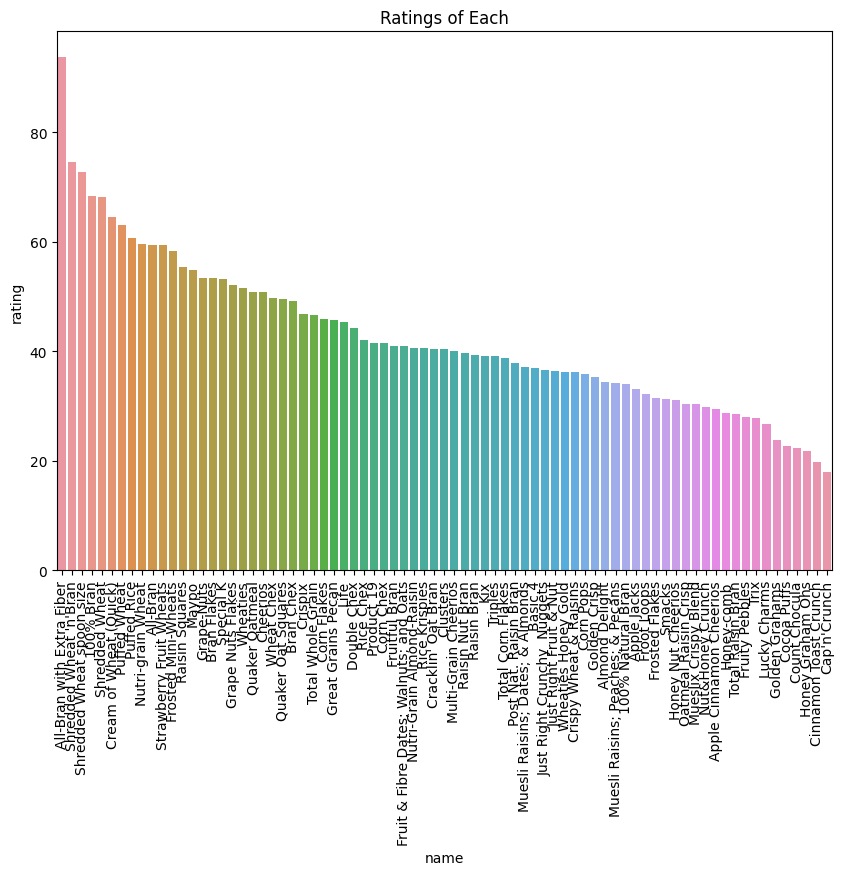

In [ ]:
# Sort the DataFrame by rating in descending order

sorted_df = df.sort_values(by= 'rating', ascending= False)
plt.figure(figsize=(10,7))
sns.barplot(data = sorted_df, x= sorted_df['name'], y= sorted_df['rating'])
plt.xticks(rotation=90)
plt.title('Ratings of Each')

Based on our barplot, it seems that the **top five brands** with the highest ratings are:

1. All-Bran with Extra Fiber

2. Shredded Wheat 'n' Bran

3. Shredded Wheat Spoon Size

4. 100% Bran

5. Shredded Wheat

### Are there any relationships between sugar content and rating?


Text(0.5, 1.0, 'Sugar v/s Ratings')

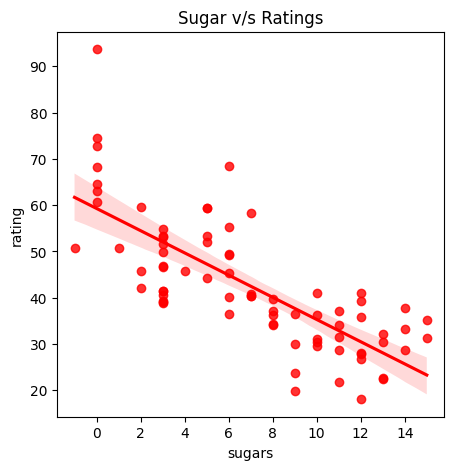

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(data = df, x= df['sugars'], y= df['rating'], color= 'r')
plt.title('Sugar v/s Ratings')

According to our regression plot analysis, there appears to be a positive correlation between lower sugar content and higher cereal
ratings

### Is there a relationship between fat content and calories?


Text(0.5, 1.0, 'Fats v/s Calories')

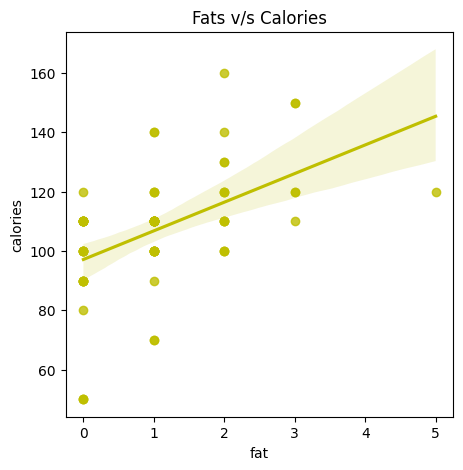

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(data = df, x= df['fat'], y= df['calories'], color= 'y')
plt.title('Fats v/s Calories')

Based on our regression plot analysis, it suggests a positive correlation between lower fat content and higher cereal ratings. This observation implies that consumers may prioritize cereals with lower fat content when making purchasing decisions.

## Using the Random Forests to check for Feature Importance


In [ ]:
#Let's drop non numerical features for our X variable
X = df.drop(['name', 'type', 'mfr', 'shelf', 'weight', 'cups', 'rating'], axis= 1)
y = df['rating']

In [ ]:
# Import and Fit our model
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X,y)

RandomForestRegressor()

In [ ]:
#Assign our important features for visualization
feature_importance = reg.feature_importances_

Text(0, 0.5, 'Nutrients')

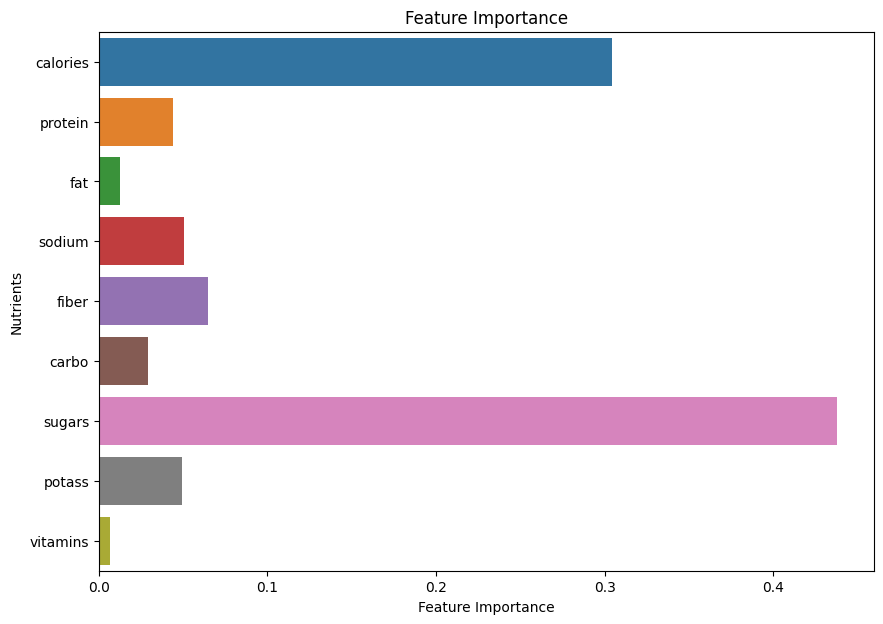

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x= feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Nutrients')